# PyTorch basics - Linear Regression from scratch

<!-- <iframe width="560" height="315" src="https://www.youtube.com/embed/ECHX1s0Kk-o?controls=0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> -->


## Tensors & Gradients

In [ ]:
!pip install torch

     ------------------------------------ 162.6/162.6 MB 912.8 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import Numpy & PyTorch
import numpy as np
import torch

import matplotlib.pyplot as plt

A tensor is a number, vector, matrix or any n-dimensional array:

<image src="https://miro.medium.com/max/1400/1*GbwKkmA0NdndXRhOOwNclA.jpeg">


In PyTorch, Tensors are objects that wrap an N-dimensional array of numbers. We use them to perform computations on GPU, and to **automatically differentiate** our functions.

In [ ]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [ ]:
# Print tensors
print(x)
print(w)
print(b)

tensor(3.)
tensor(4., requires_grad=True)
tensor(5., requires_grad=True)


We can combine tensors with the usual arithmetic operations.

In [ ]:
# Arithmetic operations
y = w * x + b
print(y)

tensor(17., grad_fn=<AddBackward0>)


What makes PyTorch special, is that we can automatically compute the derivative of `y` w.r.t. the tensors that have `requires_grad` set to `True` i.e. `w` and `b`.  (remember how much we worked for our partial derivatives?)

In [ ]:
# Compute gradients
y.backward()

In [ ]:
# Display gradients
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dw: tensor(3.)
dy/db: tensor(1.)


# Excercise - Linear regression
##Problem Statement

We'll create a model that predicts crop yeilds for apples and oranges (*target variables*) by looking at the average temperature, rainfall and humidity (*input variables or features*) in a region. Here's the training data:

<img src="https://i.imgur.com/lBguUV9.png" width="500" />

In a **linear regression** model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

```
yeild_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
yeild_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
```

Visually, it means that the yield of apples is a linear or planar function of the temperature, rainfall & humidity.

<img src="https://i.imgur.com/mtkR2lB.png" width="540" >


**Our objective**: Find a suitable set of *weights* and *biases* using the training data, to make accurate predictions.

## Training Data
The training data can be represented using 2 matrices (inputs and targets), each with one row per observation and one column per variable.

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [ ]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

Before we build a model, we need to convert inputs and targets to PyTorch tensors.

## Linear Regression Model (from scratch)

Let's define the three functions we used before:
1. Output prediction (our architecture):

$$y_{apples} = w_{11}*temp + w_{12}*rainfall + w_{12}*humidity + b_1$$
$$y_{oranges} = w_{21}*temp + w_{22}*rainfall + w_{32}*humidity + b_2$$

In [ ]:
# Define the model architecture
def output_formula(features, weights, biases):
    return features @ weights.t() + biases

Another option is to look at our *model* as simply a function that performs a matrix multiplication of the input `x` and the weights `w` (transposed) and adds the bias `b` (replicated for each observation).

$$
\hspace{2.5cm} X \hspace{1.1cm} \times \hspace{1.2cm} W^T \hspace{1.2cm}  + \hspace{1cm} b \hspace{2cm}
$$

$$
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

In [ ]:
# Matrix notation
def output_formula_matrix(features, weights, biases):
    return features @ weights.t() + biases

The matrix obtained by passing the input data to the model is a set of predictions for the target variables.

2. Loss function (same as before)

In [ ]:
# MSE loss
def error_formula(y, output):
    diff = y - output
    return torch.sum(diff * diff) / diff.numel()

3. Weight update step:


$$ w_{ij} \longrightarrow w_{ij} + \alpha \frac{\partial L}{\partial w_{ij}}$$

$$ b_i \longrightarrow b_i + \alpha \frac{\partial L}{\partial b_i}$$

Wait! This is a much more complicated function then we had before. How are we supposed to get the gradient for all these weights?

Luckily, this is just what PyTorch is for - once we compute the loss on some inputs, we can just call __loss.backward()__ and the gradients will be calculated for all of the weights automatically.

Let's see a live example:

In [ ]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.6936,  0.1105,  1.2003],
        [-0.5451, -0.1781, -1.8158]], requires_grad=True)
tensor([-0.1499, -0.1415], requires_grad=True)


In [ ]:
# Generate predictions
preds = output_formula_matrix(inputs, w, b)
print(preds)

tensor([[ 109.4973, -129.9449],
        [ 149.5080, -181.6285],
        [ 144.6160, -176.7451],
        [ 119.7572, -130.5833],
        [ 142.3348, -181.9564]], grad_fn=<AddBackward0>)


In [ ]:
# Compute loss
loss = error_formula(targets, preds)
print(loss)

tensor(35377.2930, grad_fn=<DivBackward0>)


In [ ]:
# Compute gradients
loss.backward()

As we've see, the gradients are stored in the `.grad` property of the respective tensors.

In [ ]:
print(w.grad)
print(b.grad)

tensor([[  5010.6914,   4205.0532,   2908.2151],
        [-21024.4980, -23174.2734, -14383.7207]])
tensor([  56.9427, -252.1716])


Let's proceed to write our update function:

In [ ]:
# Gradient descent step
def update_weights(x, y, weights, biases, learn_rate):
    preds = output_formula_matrix(x, weights, biases)
    loss = error_formula(y, preds)
    loss.backward()

    with torch.no_grad():
      new_weights = weights - learn_rate * weights.grad
      new_biases = biases - learn_rate * biases.grad

      weights.copy_(new_weights)
      biases.copy_(new_biases)

      weights.grad.zero_()
      biases.grad.zero_()

    return weights, biases

## Adjust weights and biases using gradient descent

We'll reduce the loss and improve our model using the gradient descent algorithm, which has the following steps:

1. Generate predictions
2. Calculate the loss
3. Compute gradients w.r.t the weights and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient
5. Reset the gradients to zero

## Train for multiple epochs

Let's rereun our training function from before:

In [ ]:
def train(features, targets, epochs, learnrate):
    
    errors = []
    last_loss = None

    # Init model weights
    w = torch.randn(2, 3, requires_grad=True)
    b = torch.randn(2, requires_grad=True)

    for e in range(epochs):
        for x, y in zip(features, targets):
            w, b = update_weights(x, y, w, b, learnrate)

        out = output_formula(features, w, b)
        loss = error_formula(targets, out)
        errors.append(loss)

    return errors

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

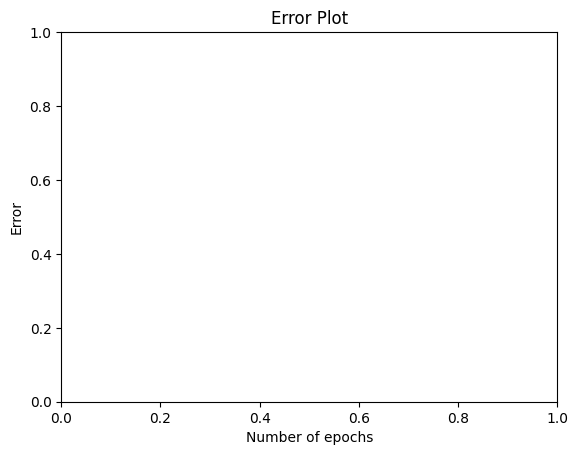

In [ ]:
epochs = 50
learnrate = 1e-5

errors = train(inputs, targets, epochs, learnrate)

# Plotting the error
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()